<h1 align=center><font size = 5> Cân bằng dữ liệu </font></h1>

In [1]:
import sys
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as path
lib_path =  path.abspath(path.join('' ,"../../api/common"))
sys.path.insert(1, lib_path)
from transform_split_data import transform_split_data
from predict import predict, evaluate
from filter_outlier import filter_outlier_value_range
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
%load_ext autotime
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")


time: 125 ms


### <span style="color:blue">1.Load data</span>

In [2]:
# Load dữ liệu
df = pd.read_csv('..\\pre_process_data\\pre_process_data.csv', encoding='utf-8')
data_df = df.copy()
data_df

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494336,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,1,58.378378
494337,2018,520,8,3,10,12,35925,2018,5,0,...,2.0,0.0,2.0,,0.0,1,2,,0,57.857143
494338,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,3.0,2.0,,1009.0,1,2,,0,57.754011
494339,2018,520,8,3,10,12,35925,2018,5,0,...,1.0,0.0,2.0,,411.0,1,2,,0,57.497782


time: 5.42 s


In [3]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494341 entries, 0 to 494340
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id$Year                      494341 non-null  int64  
 1   id$MonthDay                  494341 non-null  int64  
 2   id$JyoCD                     494341 non-null  int64  
 3   id$Kaiji                     494341 non-null  int64  
 4   id$Nichiji                   494341 non-null  int64  
 5   id$RaceNum                   494341 non-null  int64  
 6   race_id                      494341 non-null  int64  
 7   Year                         494341 non-null  int64  
 8   Month                        494341 non-null  int64  
 9   RaceInfo$TokuNum             494341 non-null  int64  
 10  RaceInfo$Nkai                494341 non-null  int64  
 11  GradeCD                      494341 non-null  object 
 12  JyokenInfo$SyubetuCD         494341 non-null  int64  
 13 

In [4]:
train_data = data_df[data_df['id$Year']<2018]
train_data

,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,race_id,Year,Month,RaceInfo$TokuNum,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.446809
1,2008,105,6,1,1,1,1,2008,1,0,...,1.0,0.0,1.0,,0.0,1,1,,1,58.496953
2,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.221024
3,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,0,57.676903
4,2008,105,6,1,1,1,1,2008,1,0,...,2.0,0.0,1.0,,0.0,1,1,,1,58.457375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475191,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,1,61.992620
475192,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.165049
475193,2017,1228,9,5,9,12,34534,2017,12,0,...,2.0,0.0,2.0,,0.0,1,2,,0,61.538462
475194,2017,1228,9,5,9,12,34534,2017,12,0,...,1.0,0.0,2.0,,0.0,1,1,,0,60.943168


time: 469 ms


### <span style="color:blue">2.Cân bằng số trận theo cự ly</span> 

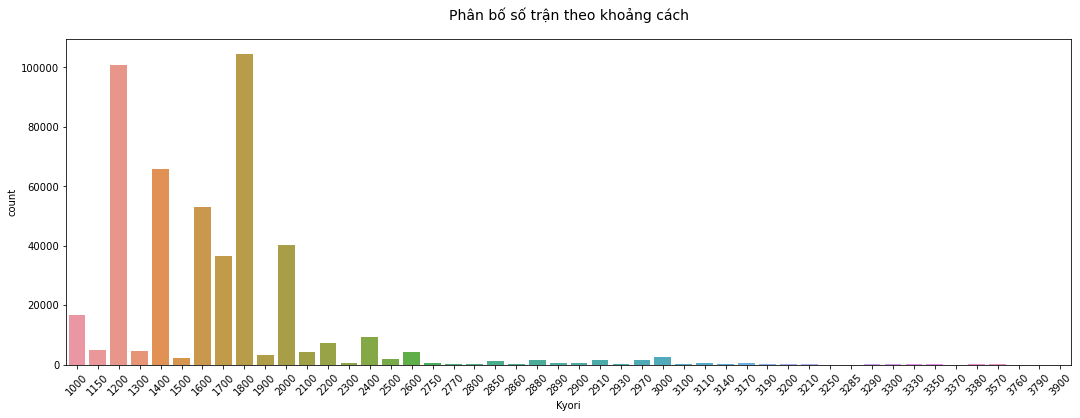

time: 1.08 s


In [5]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=train_data)
plt.title('Phân bố số trận theo khoảng cách', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

In [6]:
Kyori_df = train_data[['race_id', 'KettoNum', 'Kyori']]
Kyori_df

,race_id,KettoNum,Kyori
0,1,2005107051,1200
1,1,2005102028,1200
2,1,2005104156,1200
3,1,2005105319,1200
4,1,2005101044,1200
...,...,...,...
475191,34534,2012101892,1400
475192,34534,2013104774,1400
475193,34534,2012101704,1400
475194,34534,2012102404,1400


time: 141 ms


In [7]:
y = Kyori_df['Kyori']
Counter(y).most_common()

[(1800, 104500),
 (1200, 100744),
 (1400, 65872),
 (1600, 53017),
 (2000, 40308),
 (1700, 36631),
 (1000, 16672),
 (2400, 9422),
 (2200, 7443),
 (1150, 4937),
 (1300, 4744),
 (2600, 4399),
 (2100, 4353),
 (1900, 3282),
 (3000, 2713),
 (1500, 2126),
 (2500, 1772),
 (2970, 1696),
 (2880, 1533),
 (2910, 1435),
 (2850, 1311),
 (2750, 689),
 (2900, 611),
 (3170, 572),
 (2300, 536),
 (2890, 471),
 (3110, 447),
 (2770, 388),
 (3200, 341),
 (3100, 323),
 (3300, 286),
 (2930, 243),
 (3350, 167),
 (2800, 164),
 (3380, 136),
 (3330, 131),
 (3140, 118),
 (2860, 117),
 (3570, 110),
 (3290, 90),
 (3210, 88),
 (3190, 76),
 (3900, 49),
 (3250, 45),
 (3790, 34),
 (3370, 25),
 (3760, 16),
 (3285, 13)]

time: 219 ms


In [25]:
number_samples = 15000
list_Kyori = Kyori_df['Kyori'].unique()
data = pd.DataFrame([])
for Kyori in list_Kyori:
    my_df = Kyori_df[Kyori_df['Kyori']==Kyori]
    rate = number_samples / len(my_df)
    replace = False
    if rate >=1:
        replace = True
    my_df = my_df.sample(frac=rate, replace=replace).reset_index(drop=True)
    data = data.append(my_df, ignore_index=True)
data

,race_id,KettoNum,Kyori
0,16454,2010101805,1200
1,24861,2012104410,1200
2,20020,2009103775,1200
3,19976,2006101287,1200
4,28608,2011100553,1200
...,...,...,...
719995,29953,2012101084,2860
719996,33167,2011102225,2860
719997,33419,2012106377,2860
719998,33419,2013104743,2860


time: 453 ms


In [27]:
data.drop('Kyori', axis=1, inplace=True)
new_train_data = pd.merge(data, train_data, on=['race_id', 'KettoNum'], how='left')
new_train_data.dropna(inplace=True)
new_train_data

,race_id,KettoNum,id$Year,id$MonthDay,id$JyoCD,id$Kaiji,id$Nichiji,id$RaceNum,Year,Month,...,KS_SikakuCD,KS_MinaraiCD,KS_TozaiCD,KS_Syotai,KS_ChokyosiCode,CH_SexCD,CH_TozaiCD,CH_Syotai,top3,speed
0,16454,2010101805,2012,1007,8,4,2,1,2012,10,...,1.0,0.0,2.0,,0.0,1,2,,0,58.338960
1,24861,2012104410,2015,315,9,1,6,2,2015,3,...,2.0,0.0,2.0,,0.0,1,2,,0,57.754011
2,20020,2009103775,2013,1014,8,4,5,9,2013,10,...,1.0,0.0,2.0,,0.0,1,2,,0,59.668508
3,19976,2006101287,2013,1012,8,4,3,11,2013,10,...,2.0,0.0,2.0,,0.0,1,1,,0,63.250366
4,28608,2011100553,2016,410,6,3,6,12,2016,4,...,2.0,0.0,1.0,,0.0,1,1,,0,59.586207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719995,29953,2012101084,2016,828,10,2,10,4,2016,8,...,1.0,0.0,1.0,,1126.0,1,1,,0,52.184491
719996,33167,2011102225,2017,806,10,2,4,4,2017,8,...,1.0,0.0,2.0,,0.0,1,2,,1,53.430202
719997,33419,2012106377,2017,902,10,2,11,4,2017,9,...,1.0,0.0,2.0,,0.0,1,2,,0,52.263959
719998,33419,2013104743,2017,902,10,2,11,4,2017,9,...,3.0,0.0,2.0,,0.0,1,2,,0,52.962963


time: 4.12 s


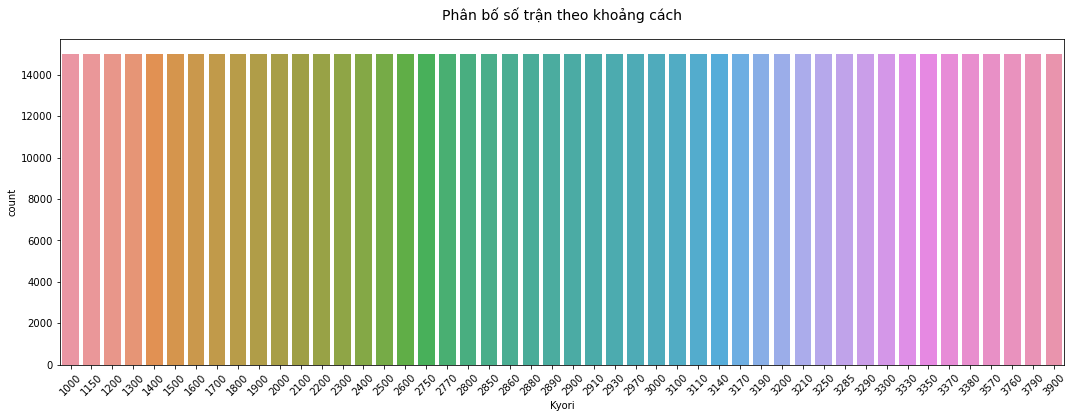

time: 1 s


In [28]:
plt.figure(figsize=(18, 6))
ax = sns.countplot(x="Kyori", data=new_train_data)
plt.title('Phân bố số trận theo khoảng cách', size=14, y=1.04);
plt.setp(ax.get_xticklabels(), rotation=45);

In [31]:
data.to_csv('balance_id2.csv', index=False)

time: 1.22 s
